# SEO Keyword Research Analysis

## Let's do some basic analysis of keywords related to our new Armada Alliance website


1. First we need to import the modules needed to build our db and run analysis
2. import the csv file with the keywords given by the google keyword planner
3. build a Pandas db
4. Analyze

In [1]:
#Importing packages
import os
import math as m
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

pd.options.mode.chained_assignment = None  # default='warn'

plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_excel('seo_terms_batch1.xlsx', sheet_name='Keyword Stats 2021-06-22 at 11_')

In [3]:
# get the number of rows
df.shape[0]

3781

In [4]:
# df1 = df.groupby(['Keyword', 'Avg. monthly searches','Competition']).size().unstack(fill_value=0)

In [5]:
Equal_five_thousand = df.loc[df['Avg. monthly searches'] == 5000]
Equal_fifty_thousand = df.loc[df['Avg. monthly searches'] == 50000]
Equal_fiveHundred_thousand = df.loc[df['Avg. monthly searches'] == 500000]

In [6]:
num_rows5k = Equal_five_thousand.shape[0]
num_rows5k

729

In [7]:
num_rows50k = Equal_fifty_thousand.shape[0]
num_rows50k

99

In [8]:
num_rows500k = Equal_fiveHundred_thousand.shape[0]
num_rows500k

11

In [9]:
Equal_fiveHundred_thousand

,Keyword,Currency,Avg. monthly searches,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,Organic impression share,Organic average position,In account?,In plan?,Searches: Jun 2020,Searches: Jul 2020,Searches: Aug 2020,Searches: Sep 2020,Searches: Oct 2020,Searches: Nov 2020,Searches: Dec 2020,Searches: Jan 2021,Searches: Feb 2021,Searches: Mar 2021,Searches: Apr 2021,Searches: May 2021,Concept: Retailer,Concept: Site,Concept: Website,Concept: Other Brands,Concept: Non-Brands,Concept: Financial Institution,Concept: Others,Concept: Exchange,Concept: Eletronics Brand
1,asic,USD,500000.0,High,100.0,0.98,11.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ada,USD,500000.0,Low,19.0,0.86,5.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,address,USD,500000.0,Low,4.0,0.23,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,cryptocurrency,USD,500000.0,Low,30.0,1.65,10.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,crypto,USD,500000.0,Low,24.0,1.80,9.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Brands,NaN,NaN,NaN,NaN
12,binance us,USD,500000.0,Low,7.0,3.32,21.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,binance,NaN
15,safemoon crypto,USD,500000.0,Low,25.0,2.74,22.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Brands,NaN,NaN,NaN,NaN
413,coincap market,USD,500000.0,Low,2.0,2.46,20.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,coincap,NaN,NaN,NaN,NaN,NaN,NaN
706,coinbase stocks,USD,500000.0,Low,3.0,1.66,16.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,coinbase,NaN
1320,crypto new,USD,500000.0,Low,14.0,1.08,14.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Brands,NaN,NaN,NaN,NaN


In [10]:
# frames = [aboveEqual_fiveHundred_thousand, aboveEqual_fifty_thousand]

#append dataframes
# top_keywords = aboveEqual_fiveHundred_thousand.append(aboveEqual_fifty_thousand, ignore_index=True)

top_keywords = Equal_fiveHundred_thousand
top_keywords = top_keywords.drop(labels=[5,15,706,1320,3471], axis=0)

In [11]:
# top_keywords.sort_values(by='Avg. monthly searches', ascending=False)

(Text(0.5, 0, 'Keyword'),
 Text(0, 0.5, 'Values'),
 Text(0.5, 1.0, 'Avg. Monthly Searches = 500,000'),
 (array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>))

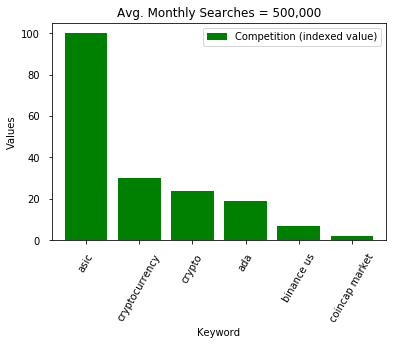

In [61]:
top_keywords = top_keywords.sort_values(by="Competition (indexed value)", ascending=False)
top_keywords.plot(x='Keyword', y=["Competition (indexed value)"], kind="bar",width=.8,color='Green', log=False)
plt.xlabel("Keyword"),plt.ylabel('Values'),plt.title("Avg. Monthly Searches = 500,000"),plt.xticks(rotation=60)

In [13]:
adalite_df = pd.read_csv('data/adalite.csv')

In [14]:
adalite_equal500 = adalite_df.loc[adalite_df['Avg. monthly searches'] == 500000]
adalite_equal500

,Keyword,Currency,Avg. monthly searches,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,Organic impression share,Organic average position,In account?,In plan?,Searches: Jun 2020,Searches: Jul 2020,Searches: Aug 2020,Searches: Sep 2020,Searches: Oct 2020,Searches: Nov 2020,Searches: Dec 2020,Searches: Jan 2021,Searches: Feb 2021,Searches: Mar 2021,Searches: Apr 2021,Searches: May 2021,Concept: Cryptocurrencies,Concept: Currency,Concept: Company,Concept: Website,Concept: Other Brands,Concept: Non-Brands,Concept: Financial Institution,Concept: Others,Concept: Exchange
4,cryptocurrency,USD,500000.0,Low,30.0,1.65,10.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,crypto,USD,500000.0,Low,24.0,1.80,9.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,binance us,USD,500000.0,Low,7.0,3.32,21.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,binance
10,safemoon crypto,USD,500000.0,Low,25.0,2.74,22.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Brands,NaN,NaN,NaN
295,coincap market,USD,500000.0,Low,2.0,2.46,20.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,coincap,NaN,NaN,NaN,coin market cap,NaN
502,coinbase stocks,USD,500000.0,Low,3.0,1.66,16.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,coinbase
967,crypto new,USD,500000.0,Low,14.0,1.08,14.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
adalite_equal500.sort_values(by='Avg. monthly searches', ascending=False)
index_names = adalite_equal500[adalite_equal500['Avg. monthly searches'] < 500000 ].index
adalite_equal500.drop(index_names, axis=0)

,Keyword,Currency,Avg. monthly searches,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,Organic impression share,Organic average position,In account?,In plan?,Searches: Jun 2020,Searches: Jul 2020,Searches: Aug 2020,Searches: Sep 2020,Searches: Oct 2020,Searches: Nov 2020,Searches: Dec 2020,Searches: Jan 2021,Searches: Feb 2021,Searches: Mar 2021,Searches: Apr 2021,Searches: May 2021,Concept: Cryptocurrencies,Concept: Currency,Concept: Company,Concept: Website,Concept: Other Brands,Concept: Non-Brands,Concept: Financial Institution,Concept: Others,Concept: Exchange
4,cryptocurrency,USD,500000.0,Low,30.0,1.65,10.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,crypto,USD,500000.0,Low,24.0,1.80,9.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,binance us,USD,500000.0,Low,7.0,3.32,21.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,binance
10,safemoon crypto,USD,500000.0,Low,25.0,2.74,22.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Brands,NaN,NaN,NaN
295,coincap market,USD,500000.0,Low,2.0,2.46,20.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,coincap,NaN,NaN,NaN,coin market cap,NaN
502,coinbase stocks,USD,500000.0,Low,3.0,1.66,16.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,coinbase
967,crypto new,USD,500000.0,Low,14.0,1.08,14.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bitcoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(Text(0.5, 0, 'Keyword'),
 Text(0, 0.5, 'Values'),
 Text(0.5, 1.0, 'Avg. Monthly Searches = 500,000'),
 (array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>))

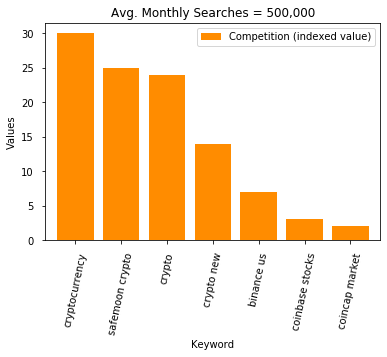

In [60]:
adalite_equal500 = adalite_equal500.sort_values(by="Competition (indexed value)", ascending=False)
adalite_equal500.plot(x='Keyword', y=["Competition (indexed value)"], kind="bar",width=.8,color='darkorange', log=False)
plt.xlabel("Keyword"),plt.ylabel('Values'),plt.title("Avg. Monthly Searches = 500,000"),plt.xticks(rotation=78)

In [17]:
keywords_adalite = np.array(adalite_equal500['Keyword']).reshape(-1,1)

In [18]:
keywords_adalite = [element for sublst in keywords_adalite for element in sublst]
# get the keywords into a txt file
myText = open(r'/Users/waelivie/Desktop/armada-seo-research/adalite.txt','w')
for i in keywords_adalite:
    myText.write(i + '\n')

myText.close()

**So we can see that adalite keyword is basically not useful for being a Keyword, so let's move on and try a different term that is related** 

In [19]:
crypto_wallet_df = pd.read_csv('data/crypto-wallet.csv')

In [20]:
crypto_wallet_equal50 = crypto_wallet_df.loc[crypto_wallet_df['Avg. monthly searches'] == 50000]
crypto_wallet_equal500 = crypto_wallet_df.loc[crypto_wallet_df['Avg. monthly searches'] == 500000]

In [21]:
crypto_wallet_equal500.shape[0]

0

In [22]:
crypto_wallet_equal50.shape[0]

3

(Text(0.5, 0, 'Keyword'),
 Text(0, 0.5, 'Values'),
 Text(0.5, 1.0, 'Avg. Monthly Searches = 50,000'))

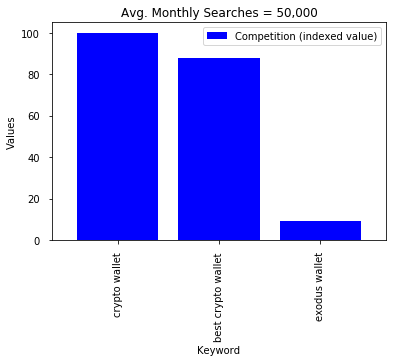

In [59]:
crypto_wallet_equal50 = crypto_wallet_equal50.sort_values(by='Competition (indexed value)', ascending=False)
crypto_wallet_equal50.plot(x='Keyword', y=["Competition (indexed value)"], kind="bar",width=.8,color='Blue', log=False)
plt.xlabel("Keyword"),plt.ylabel('Values'),plt.title("Avg. Monthly Searches = 50,000")

In [24]:
allTerms_df = pd.read_csv('data/term_keywords.csv')

In [25]:
allTerms_equal500 = allTerms_df.loc[allTerms_df['Avg. monthly searches'] == 500000]
allTerms_equal500.shape[0]

18

(Text(0.5, 0, 'Keyword'),
 Text(0, 0.5, 'Values'),
 Text(0.5, 1.0, 'Avg. Monthly Searches = 500,000'),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17]), <a list of 18 Text xticklabel objects>))

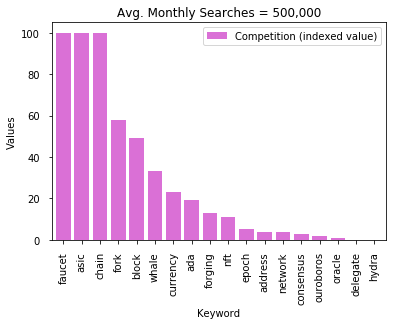

In [58]:
allTerms_equal500 = allTerms_equal500.sort_values(by="Competition (indexed value)", ascending=False)
allTerms_equal500.plot(x='Keyword', y=["Competition (indexed value)"], kind="bar",width=.8,color='orchid', log=False)
plt.xlabel("Keyword"),plt.ylabel('Values'),plt.title("Avg. Monthly Searches = 500,000"),plt.xticks(rotation=90)

In [27]:
allTerms_equal50 = allTerms_df.loc[allTerms_df['Avg. monthly searches'] == 50000]
allTerms_equal50.shape[0]

39

In [28]:
allTerms_equal50 = allTerms_equal50.sort_values(by="Competition (indexed value)", ascending=False)

(Text(0.5, 0, 'Keyword'),
 Text(0, 0.5, 'Values'),
 Text(0.5, 1.0, 'Avg. Monthly Searches = 50,000'),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>))

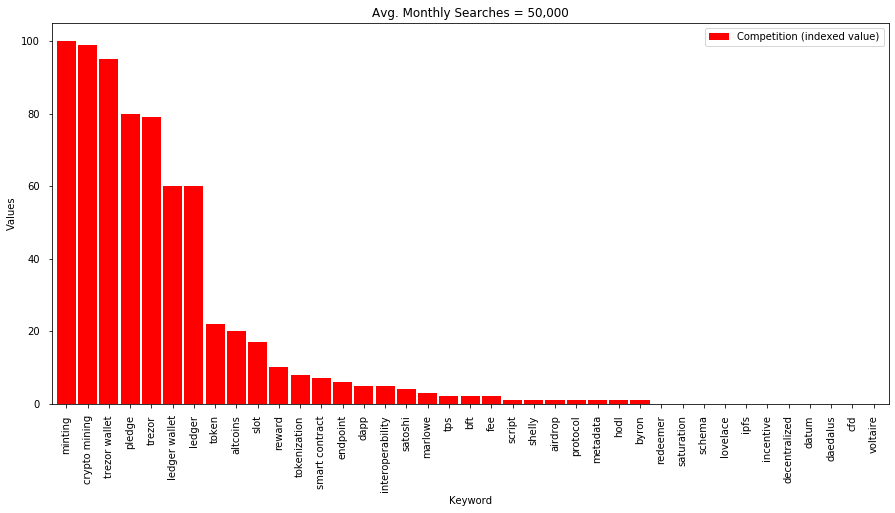

In [29]:
allTerms_equal50.plot(x='Keyword', y=["Competition (indexed value)"], kind="bar",width=.9,color='Red', log=False, figsize=(15,7))
plt.xlabel("Keyword"),plt.ylabel('Values'),plt.title("Avg. Monthly Searches = 50,000"),plt.xticks(rotation=90)

In [45]:
allTerms_equal5 = allTerms_df.loc[allTerms_df['Avg. monthly searches'] == 5000]
allTerms_equal5.shape[0]

28

In [46]:
allTerms_equal5 = allTerms_equal5.sort_values(by="Competition (indexed value)", ascending=False)

(Text(0.5, 0, 'Keyword'),
 Text(0, 0.5, 'Values'),
 Text(0.5, 1.0, 'Avg. Monthly Searches = 5,000'),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
  <a list of 28 Text xticklabel objects>))

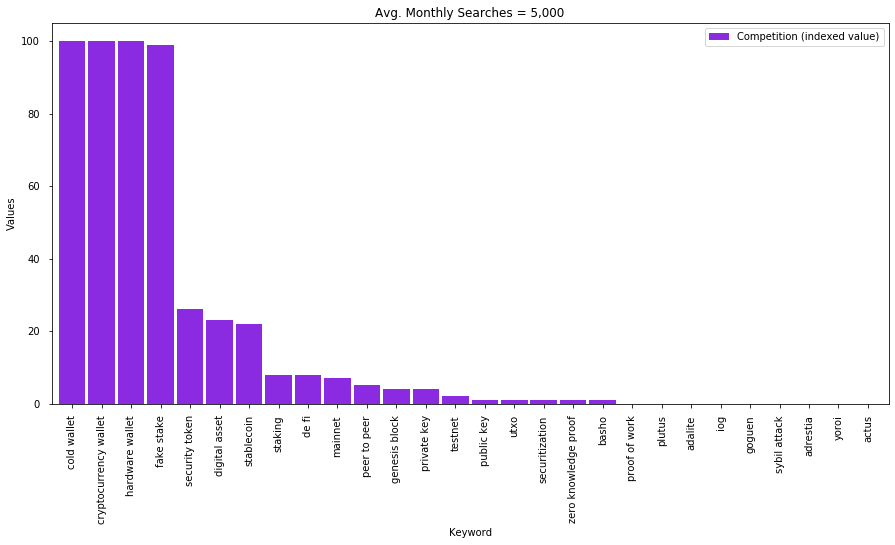

In [57]:
allTerms_equal5.plot(x='Keyword', y=["Competition (indexed value)"], kind="bar",width=.9,color='blueviolet', log=False, figsize=(15,7))
plt.xlabel("Keyword"),plt.ylabel('Values'),plt.title("Avg. Monthly Searches = 5,000"),plt.xticks(rotation=90)